In [52]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('offenses_new_york_by_city_2013.csv', sep=';',header=0)
df.head(10)

len(df)

348

In [53]:
#create categorical variables from robbery and Murder

df['Robbery2'] = np.where(df['Robbery']>0, 1, 0)
df['Murder2'] = np.where(df['Murder']>0, 1, 0)

mean_rob=df['Robbery'].mean()
mean_mur=df['Murder'].mean()
df['Robbery3'] = np.where(df['Robbery']>mean_rob, 1, 0)
df['Murder3'] = np.where(df['Murder']>mean_mur, 1, 0)
df.head(5)


,City,Population,Violent_crime,Murder,Rape (revised definition)1,Rape,Robbery,Assault,Property_crime,Burglary,Larceny- theft,Motor_vehicle_theft,Arson3,Robbery2,Murder2,Robbery3,Murder3
0,New York,8396126,52384,335,nan,1112,19170,31767,141971,16606,117931,7434,nan,1,1,1,1
1,Buffalo,258789,3249,47,nan,145,1322,1735,12491,3458,8076,957,nan,1,1,1,1
2,Rochester,210562,2107,42,nan,92,918,1055,10051,2587,6855,609,132.000,1,1,1,1
3,Syracuse,143834,1192,21,nan,75,400,696,6473,1781,4298,394,57.000,1,1,1,1
4,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan,1,1,1,1


/usr/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib64/python3.4/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


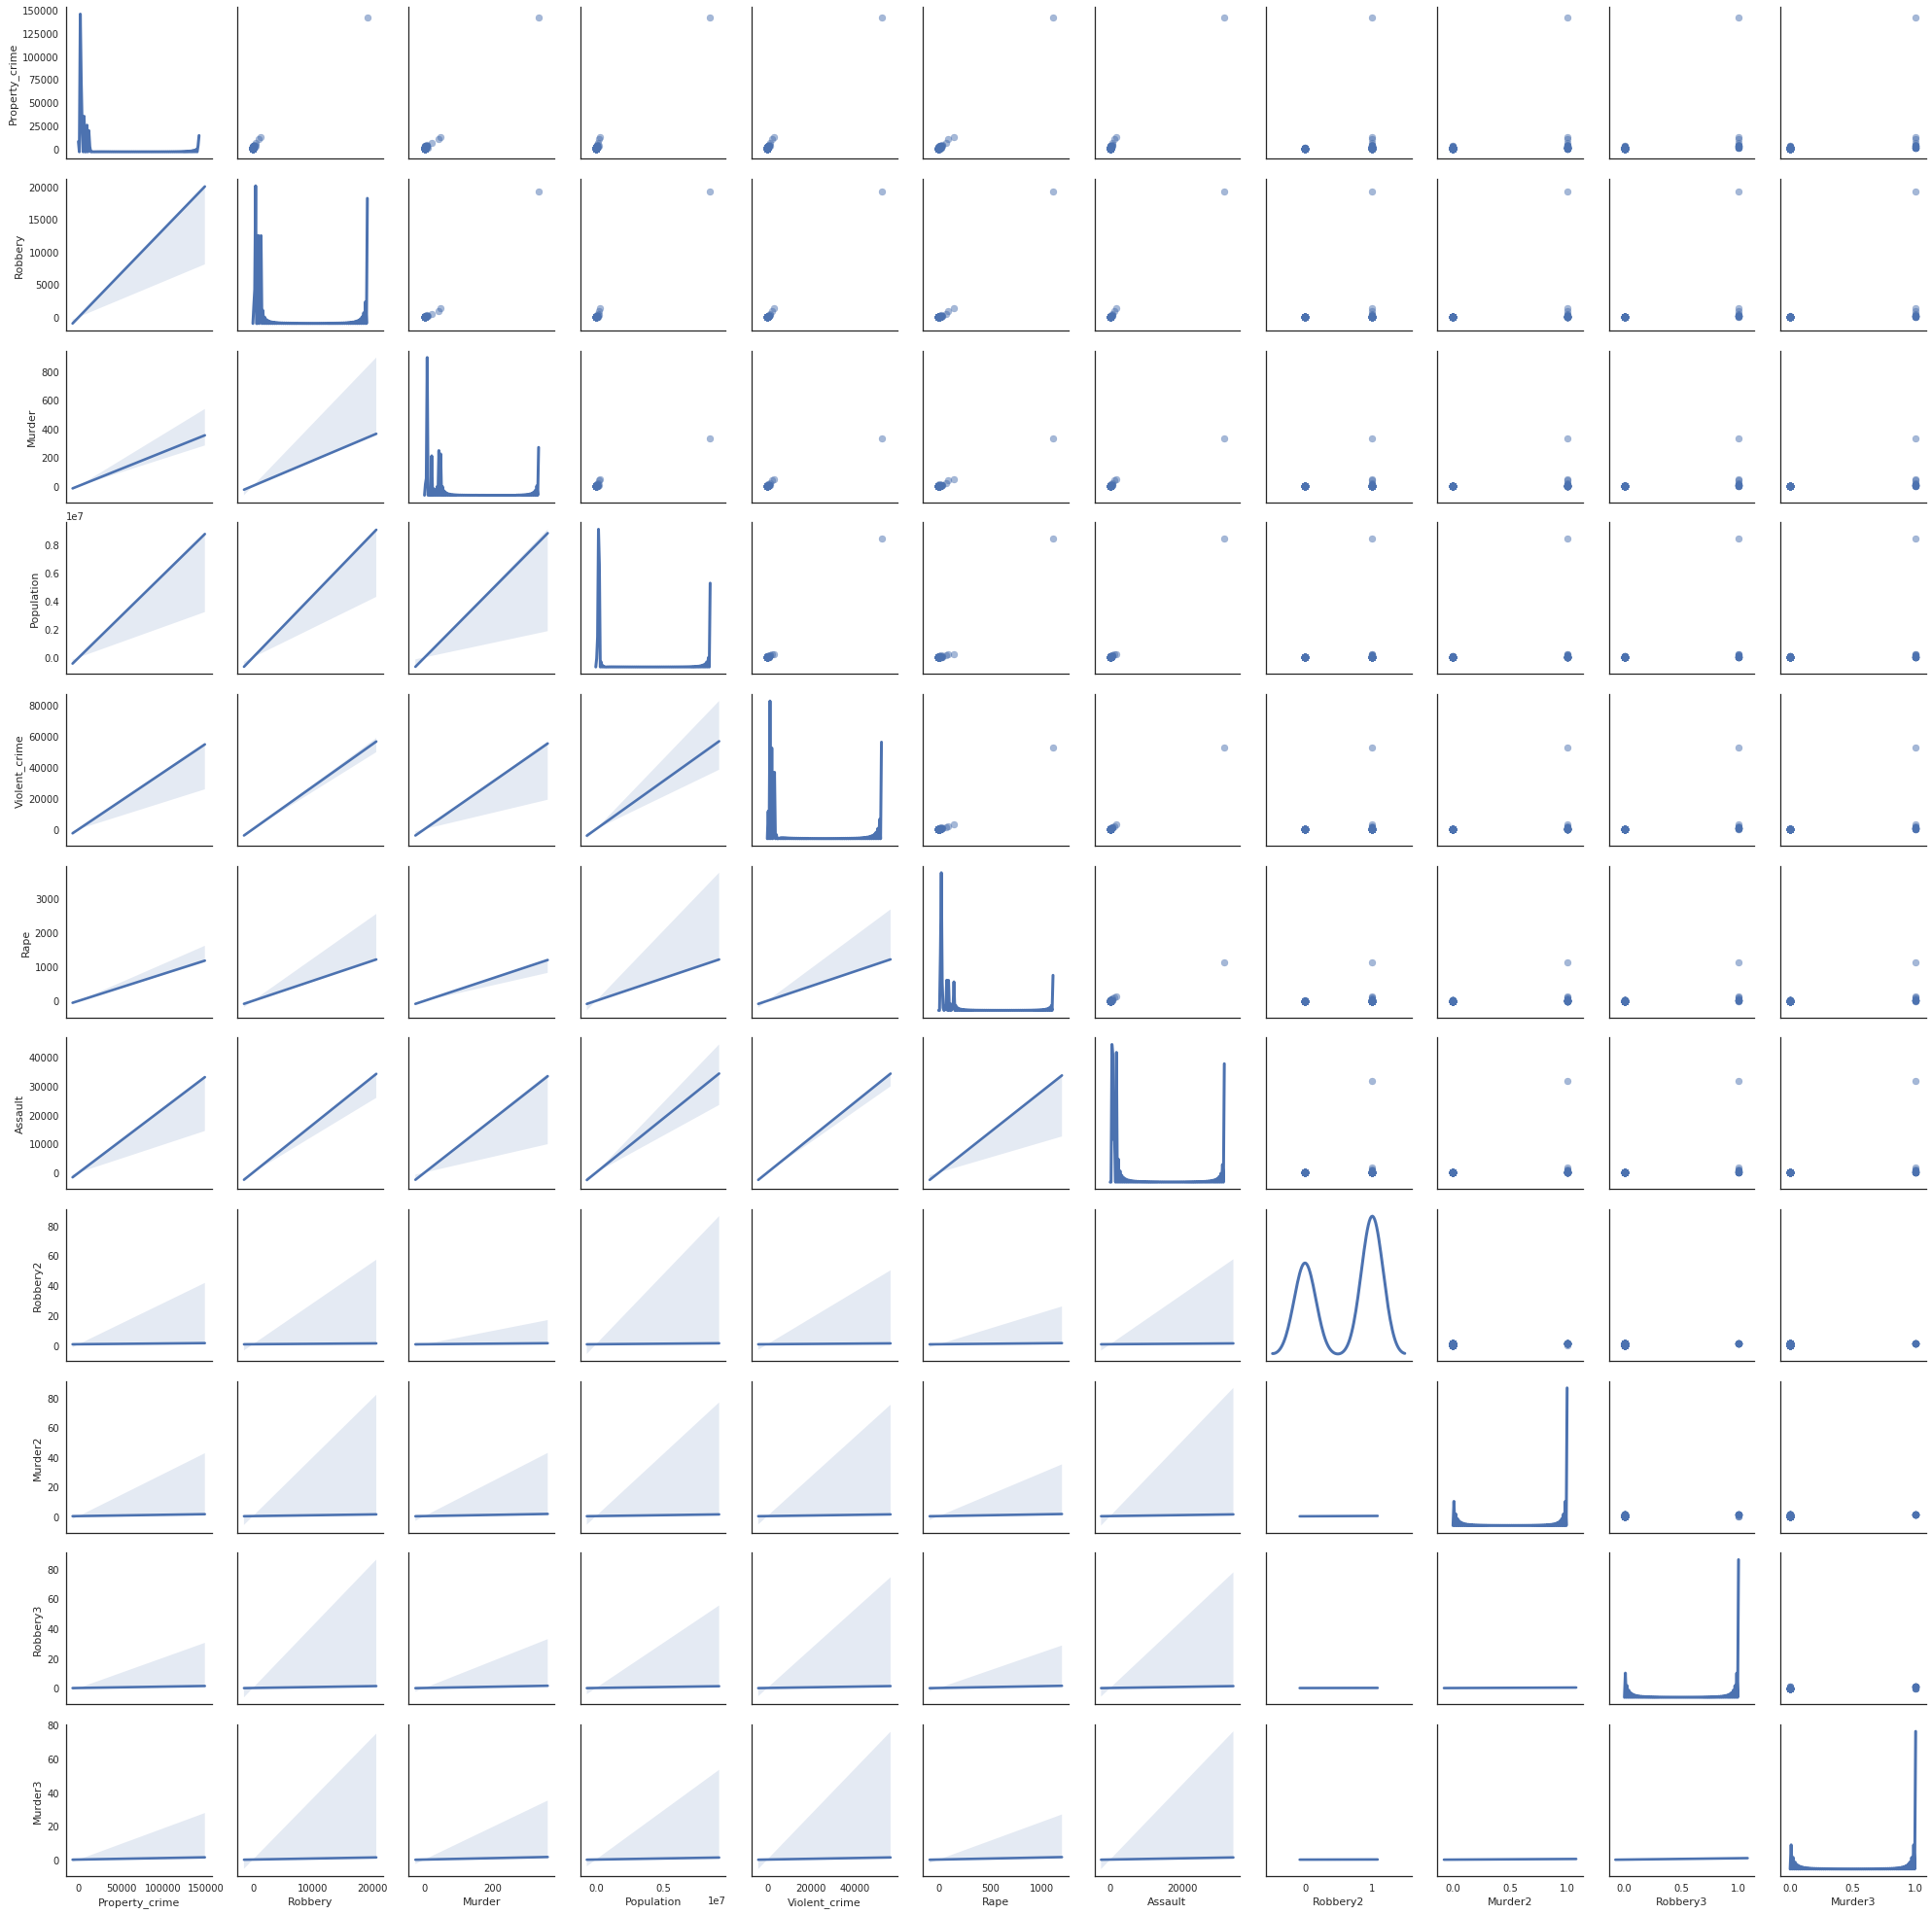

In [54]:
# Make the scatterplot matrix
# Set the default plot aesthetics to be prettier.
sns.set_style("white")

# Take a subset of the data to make plots clearer.
df_light = df[['Property_crime','Robbery', 'Murder', 'Population','Violent_crime','Rape','Assault','Robbery2','Murder2','Robbery3','Murder3']]

df_light= df_light.dropna()

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_light.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

#Some warnings will show up below because the plot does not include a legend.


                Property_crime  Robbery  Murder  Population  Violent_crime  \
Property_crime           1.000    0.998   0.995       0.996          0.998   
Robbery                  0.998    1.000   0.993       0.998          1.000   
Murder                   0.995    0.993   1.000       0.987          0.992   
Population               0.996    0.998   0.987       1.000          0.999   
Violent_crime            0.998    1.000   0.992       0.999          1.000   
Rape                     0.998    0.995   0.998       0.991          0.995   
Assault                  0.998    1.000   0.991       0.999          1.000   
Robbery2                 0.079    0.058   0.070       0.064          0.058   
Murder2                  0.191    0.166   0.212       0.162          0.166   
Robbery3                 0.319    0.294   0.349       0.273          0.292   
Murder3                  0.306    0.283   0.345       0.265          0.281   

                Rape  Assault  Robbery2  Murder2  Robbery3  Mur

/usr/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


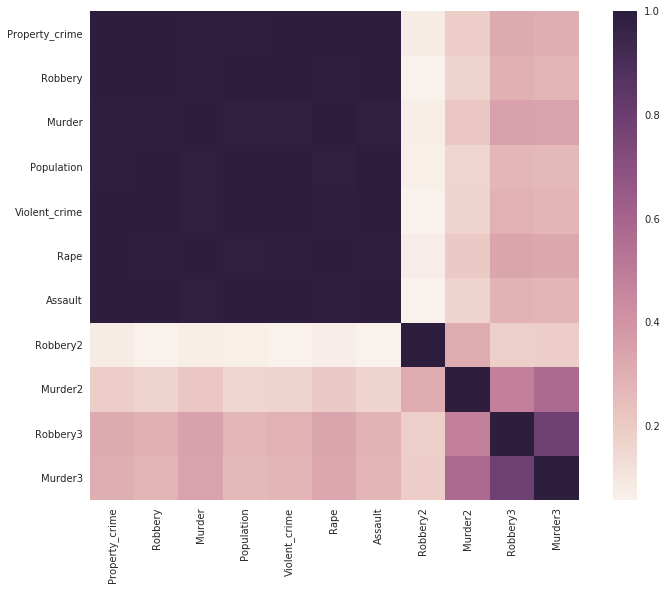

In [55]:
# Make the correlation matrix.
corrmat = df_light.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=1, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

In [123]:
# Remove extreme value (+-2sd)

mean_rob=df['Robbery'].mean()
std_rob=df['Robbery'].std()

df_light2 =df_light[df_light.Robbery<mean_rob+(1*std_rob)]


/usr/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib64/python3.4/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


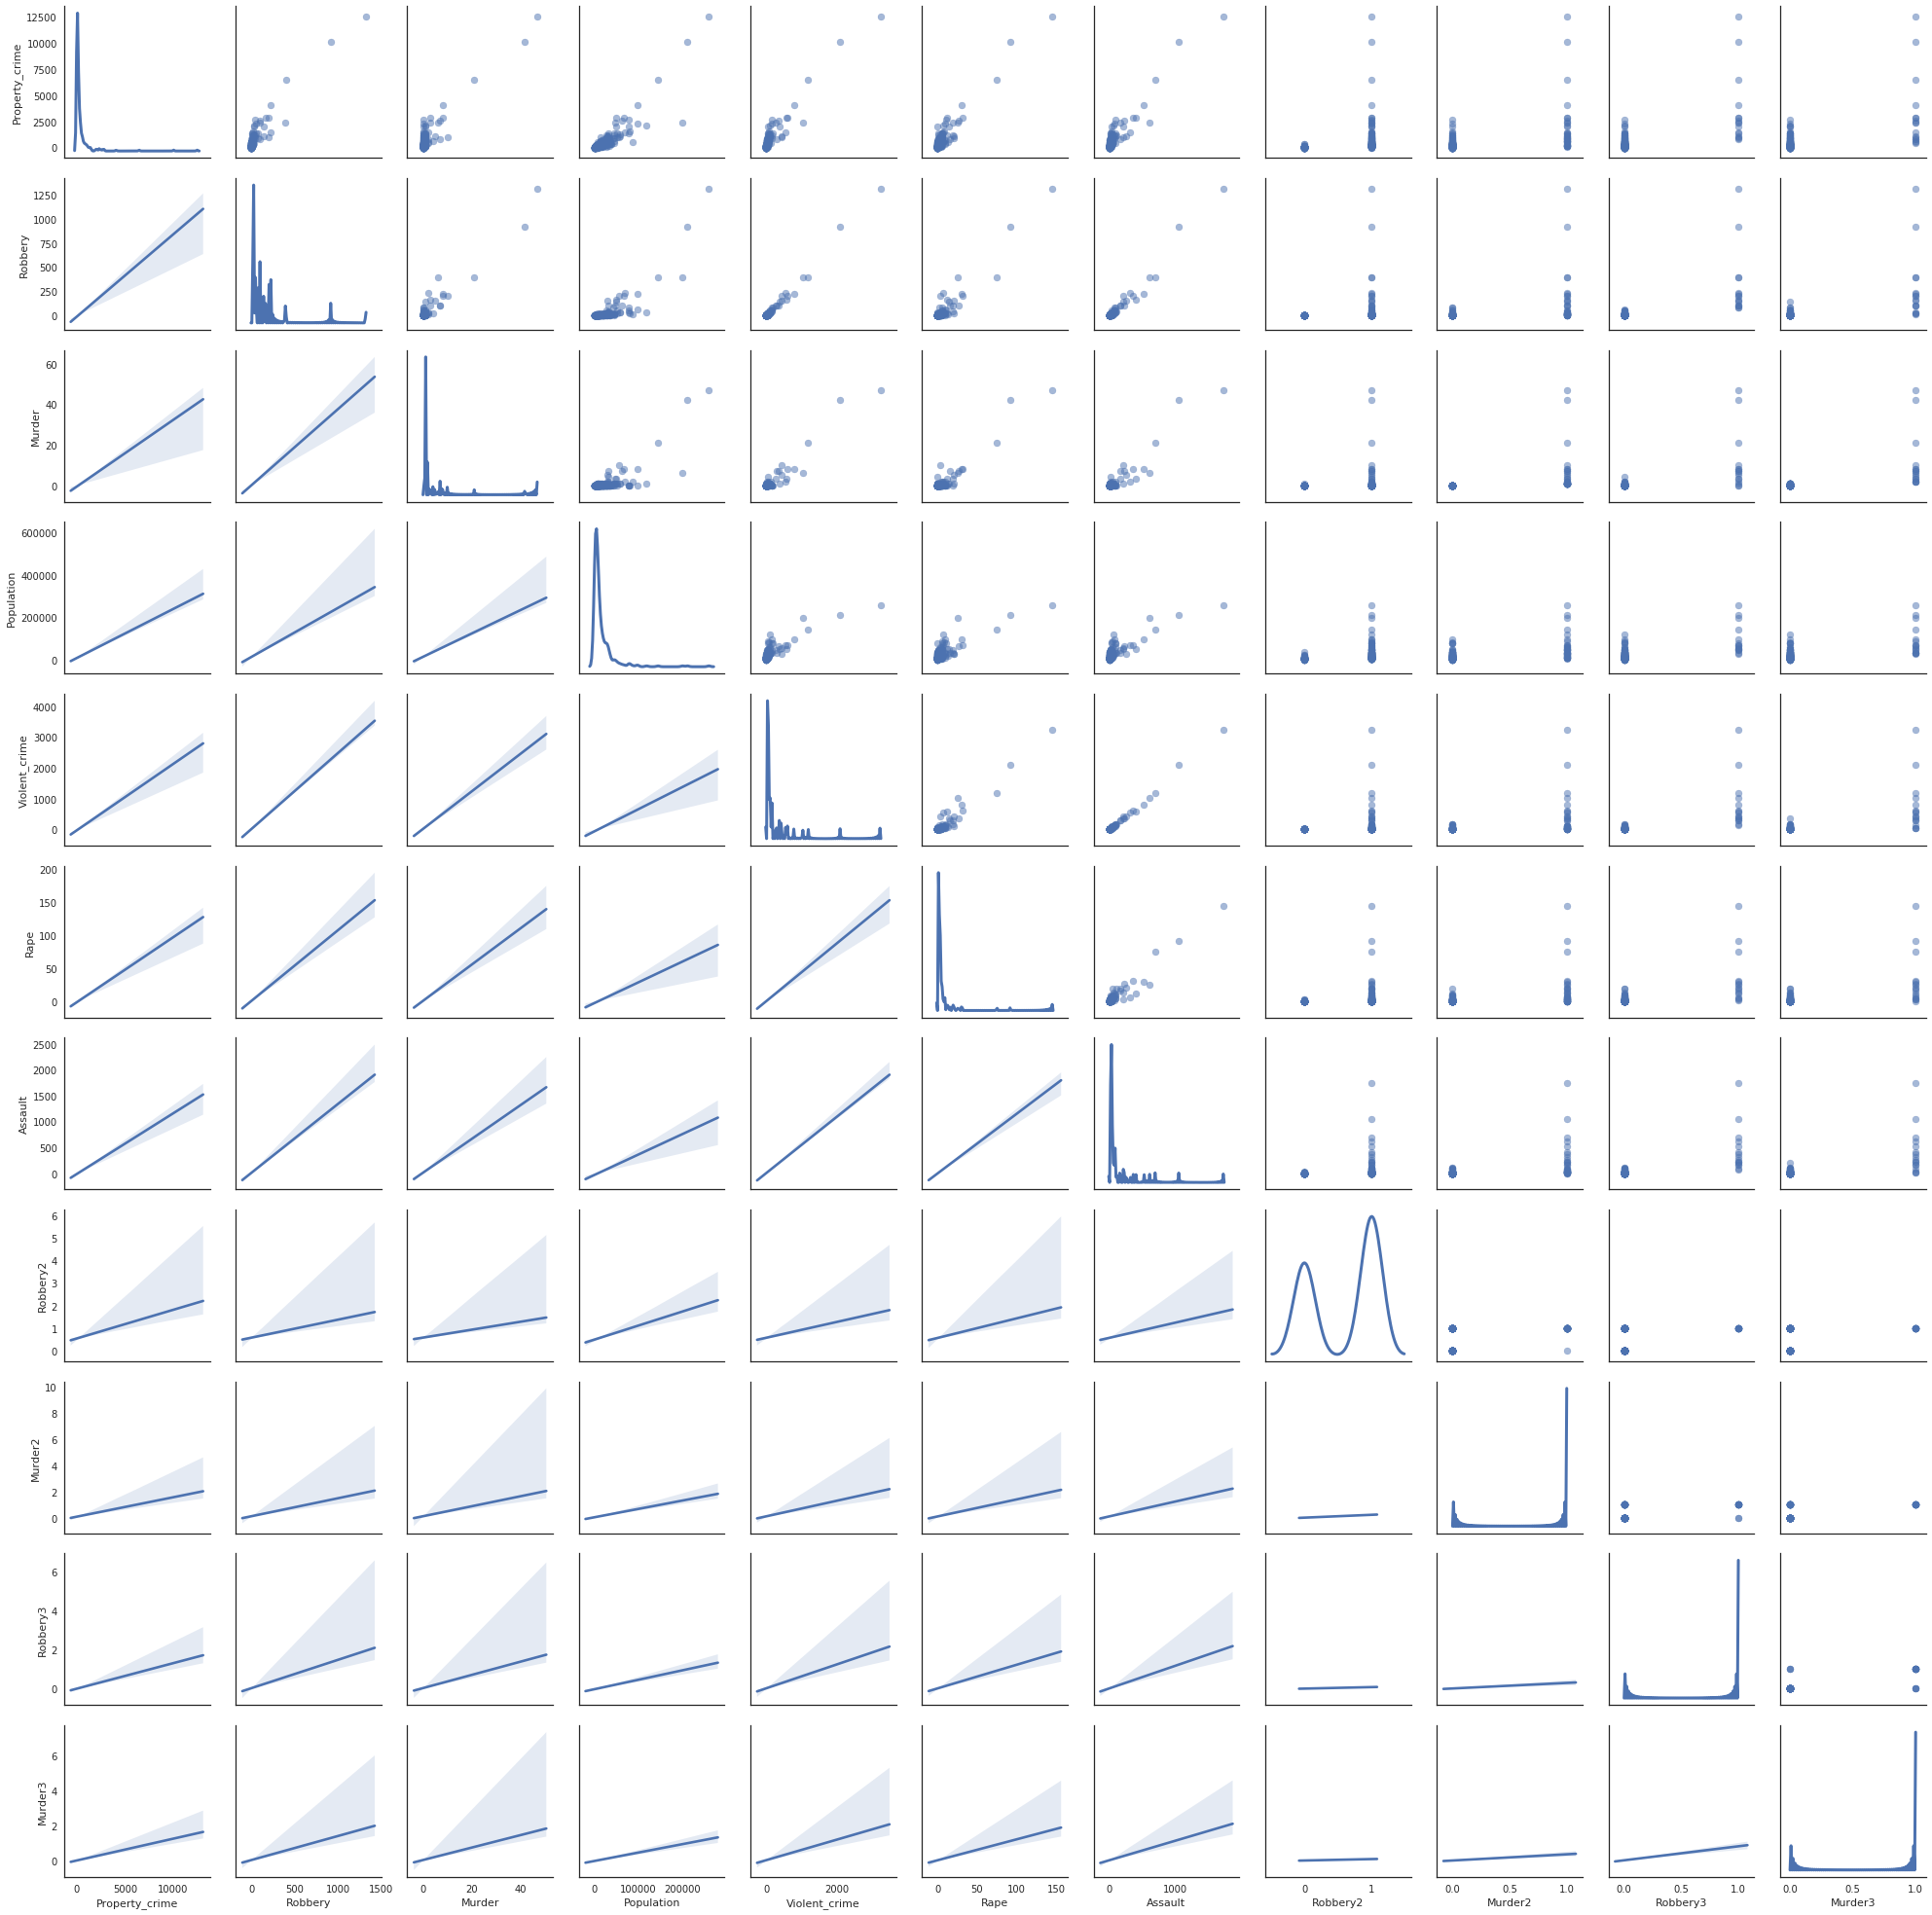

In [57]:
# Make the scatterplot matrix
# Set the default plot aesthetics to be prettier.
sns.set_style("white")


df_light2= df_light2.dropna()

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_light2.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [124]:

mean_rob=df_light2['Robbery'].mean()
std_rob=df_light2['Robbery'].std()

mean_mur=df_light2['Murder'].mean()
std_mur=df_light2['Murder'].std()

mean_pop=df_light2['Population'].mean()
std_pop=df_light2['Population'].std()

mean_vc=df_light2['Violent_crime'].mean()
std_vc=df_light2['Violent_crime'].std()

mean_rap=df_light2['Rape'].mean()
std_rap=df_light2['Rape'].std()

mean_as=df_light2['Assault'].mean()
std_as=df_light2['Assault'].std()

df_light2['rob_adj'] =((df_light2['Robbery']-mean_rob)/std_rob)
df_light2['mur_adj'] =((df_light2['Murder']-mean_mur)/std_mur)
df_light2['pop_adj'] =((df_light2['Population']-mean_pop)/std_pop)
df_light2['vc_adj'] =((df_light2['Violent_crime']-mean_vc)/std_vc)
df_light2['rap_adj'] =((df_light2['Rape']-mean_rap)/std_rap)
df_light2['as_adj'] =((df_light2['Assault']-mean_as)/std_as)




/usr/lib/python3.4/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python3.4/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python3.4/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/p

                Property_crime  Robbery  Murder  Population  Violent_crime  \
Property_crime           1.000    0.737   0.612       0.829          0.781   
Robbery                  0.737    1.000   0.786       0.726          0.983   
Murder                   0.612    0.786   1.000       0.532          0.797   
Population               0.829    0.726   0.532       1.000          0.724   
Violent_crime            0.781    0.983   0.797       0.724          1.000   
Rape                     0.795    0.742   0.706       0.629          0.811   
Assault                  0.784    0.963   0.782       0.710          0.996   
rob_adj                  0.737    1.000   0.786       0.726          0.983   
mur_adj                  0.612    0.786   1.000       0.532          0.797   
pop_adj                  0.829    0.726   0.532       1.000          0.724   
vc_adj                   0.781    0.983   0.797       0.724          1.000   
rap_adj                  0.795    0.742   0.706       0.629     

/usr/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


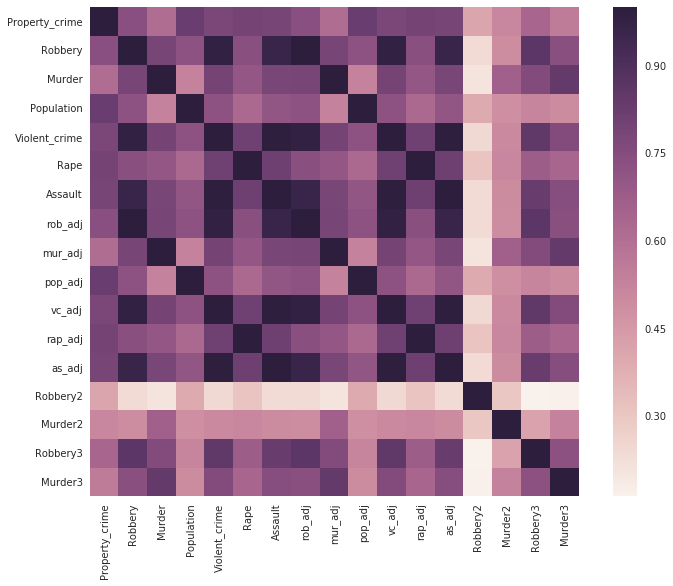

In [209]:
# Make the correlation matrix.
# Take a subset of the data to make plots clearer.
df_light3 = df_light2[['Property_crime','Robbery', 'Murder', 'Population','Violent_crime','Rape','Assault','rob_adj', 'mur_adj', 'pop_adj','vc_adj','rap_adj','as_adj','Robbery2','Murder2','Robbery3','Murder3']]


#test remove outliers
df_light3 =df_light3[df_light3.Property_crime<6000]

corrmat = df_light3.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=1, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

In [210]:
# CREATE MODEL

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format


# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
df_light3= df_light3.dropna()

# Instantiate our model.
X=df_light3.drop('Property_crime',axis=1)

lm=LinearRegression()

lm.fit(X, df_light3['Property_crime'])

print('nb coeff:' , len(lm.coef_))

pd.DataFrame(list(zip(X.columns,lm.coef_)), columns= ['Features','Estimated Coeff'])


nb coeff: 16


,Features,Estimated Coeff
0,Robbery,-14.480
1,Murder,-6.073
2,Population,0.014
3,Violent_crime,5.734
4,Rape,27.113
5,Assault,-0.827
6,rob_adj,-0.226
7,mur_adj,-2.214
8,pop_adj,0.000
9,vc_adj,0.035


/usr/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib64/python3.4/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


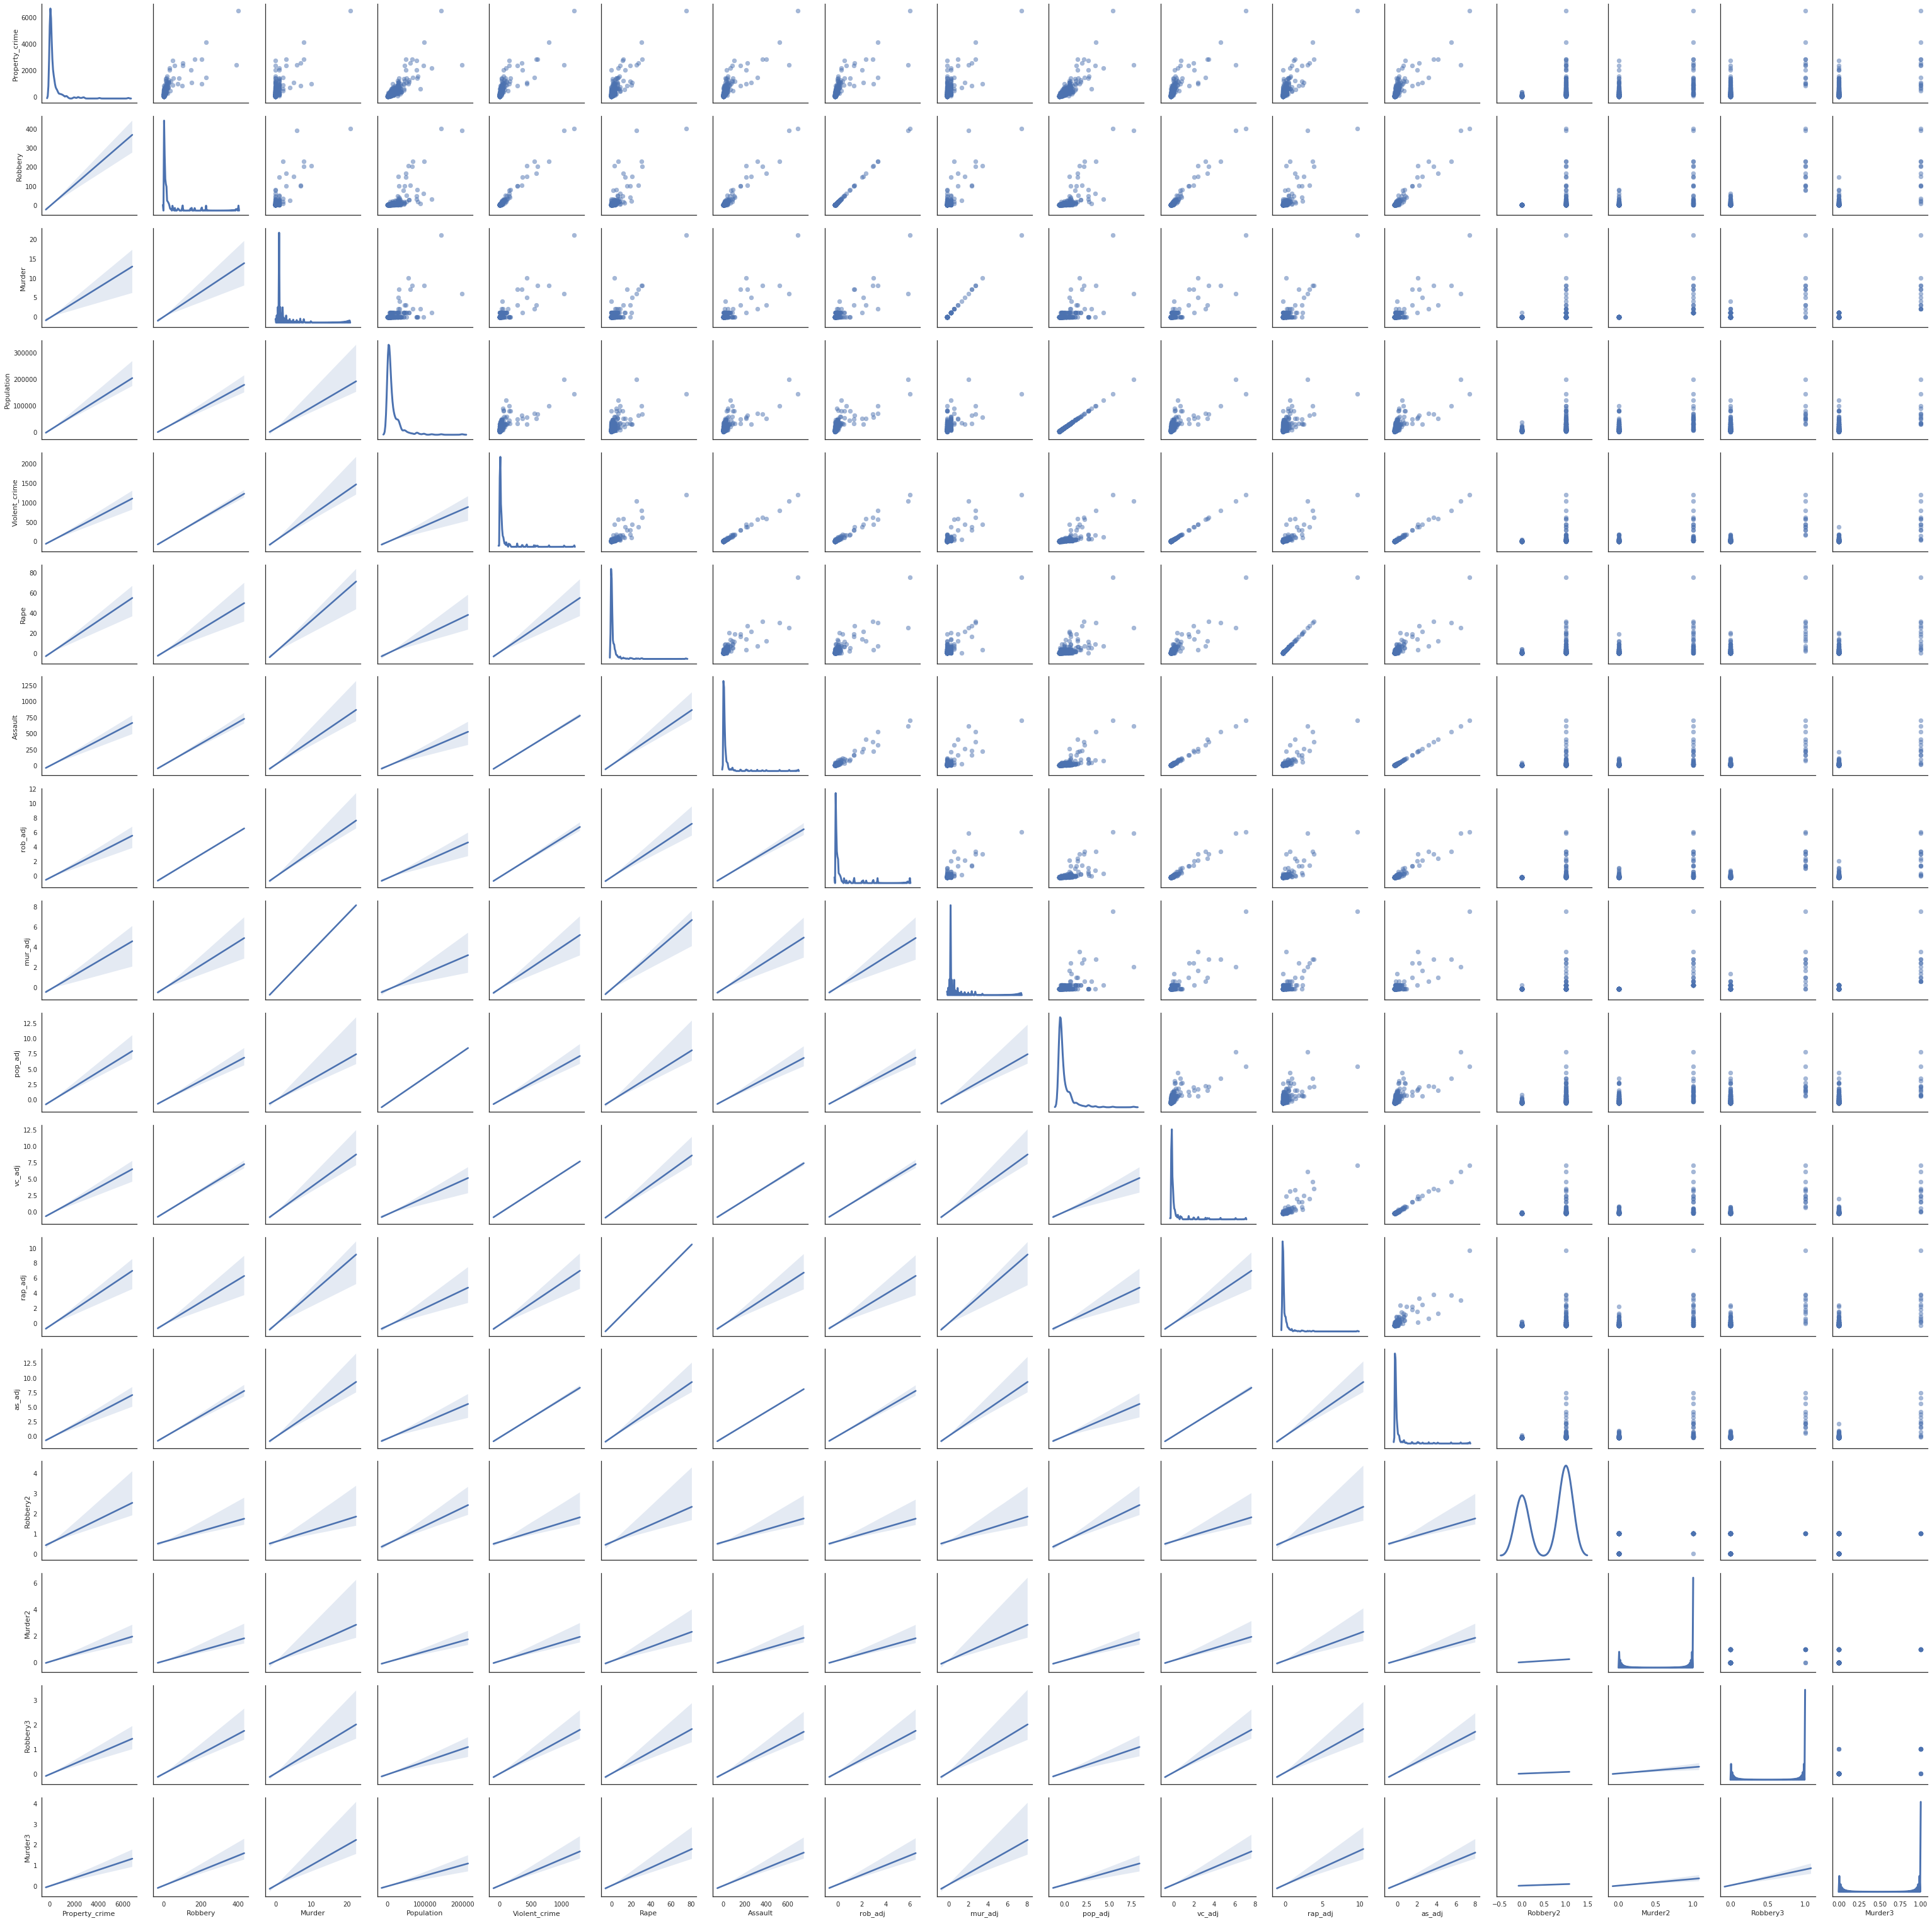

In [140]:
# Make the scatterplot matrix
# Set the default plot aesthetics to be prettier.
sns.set_style("white")


df_light3= df_light3.dropna()

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_light3.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

/usr/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


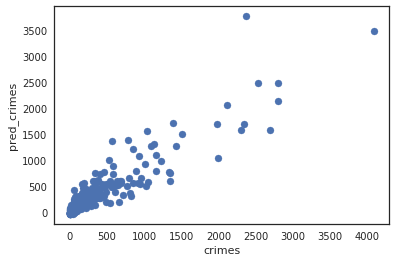

In [211]:
#Predit crime

lm.predict(X)

plt.scatter(df_light3['Property_crime'],lm.predict(X))
plt.xlabel("crimes")
plt.ylabel("pred_crimes")

In [212]:
#Calculate mean squared eror

mse=np.mean((df_light3['Property_crime']-lm.predict(X))**2)
print(mse)

Y_pred = lm.predict(X)

print('R-squared regression:', lm.score(X, df_light3['Property_crime']))

41933.0637638
R-squared regression: 0.841357423806


In [213]:
#Split train test
X=df_light3.drop('Property_crime',axis=1)
Y=df_light3['Property_crime']

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X,Y, test_size=0.3,random_state=0)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(240, 16)
(104, 16)
(240,)
(104,)


In [214]:
#Build linear regression suing train test dataset

lm=LinearRegression()
lm.fit(X_train, Y_train)
pred_train=lm.predict(X_train)
pred_test=lm.predict(X_test)

/usr/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


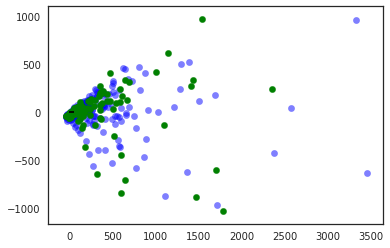

In [215]:
#Residual Plot

plt.scatter(pred_train, pred_train - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(pred_test, pred_test - Y_test, c='g', s=40)
plt.hlines(y=0, xmin=0,xmax=50)

In [216]:
print('R-squared regression:', lm.score(X_train, Y_train))
print('R-squared regression:', lm.score(X_test, Y_test))

R-squared regression: 0.854031760746
R-squared regression: 0.745408657907


R-squared regression: 0.854031760746
R-squared PLSR: 0.62931178712


/usr/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


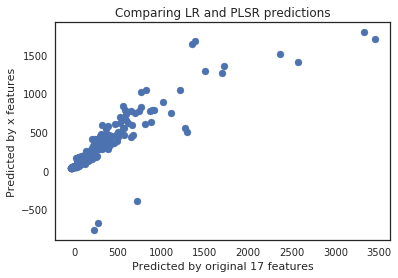

In [235]:
# Save predicted values.

Y_pred=lm.predict(X_train)
print('R-squared regression:', lm.score(X_train, Y_train))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to x dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X_train, Y_train)

# Save predicted values.
Y_PLS_pred = pls1.predict(X_train)
print('R-squared PLSR:', pls1.score(X_train, Y_train))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 17 features')
plt.ylabel('Predicted by x features')
plt.title('Comparing LR and PLSR predictions')
plt.show()